# Lab #2: Probability, Distributions, and Statistical Questions

## Problem 1

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from scipy.stats import chi2_contingency

### A)

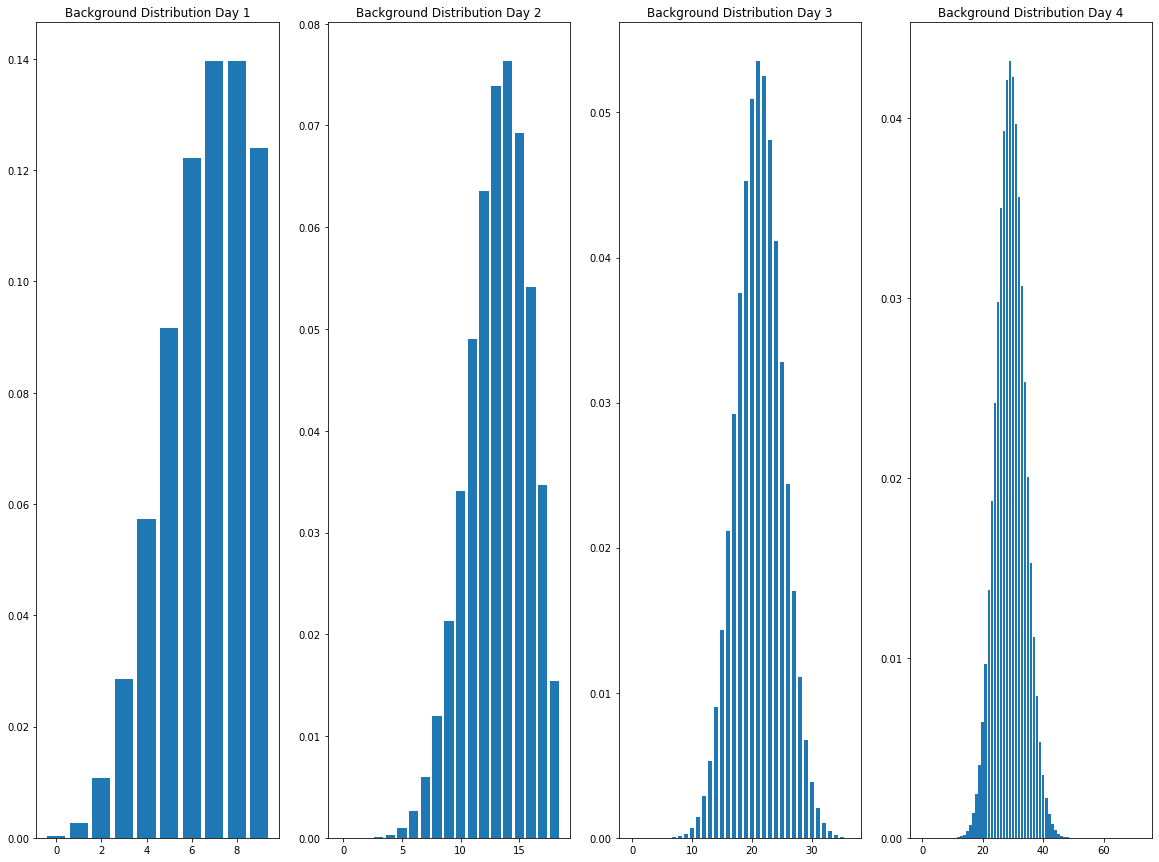

In [41]:
plt.rcParams["figure.figsize"] = (20,15)
mu = 8 # average cosmic ray background
fig, ax = plt.subplots(1, 4)

x = np.arange(0, 10)
f = stats.poisson.pmf(x, mu)
ax[0].set_title("Background Distribution Day 1")
ax[0].bar(x, f)

for i in range(1, 4):
    f = np.convolve(f, stats.poisson.pmf(x, mu))
    x = np.arange(0, len(f))
    ax[i].set_title("Background Distribution Day " + str(i + 1))
    ax[i].bar(x, f)

### B)

Chi-square value:  20735.0  P-value:  0.23999896276428748


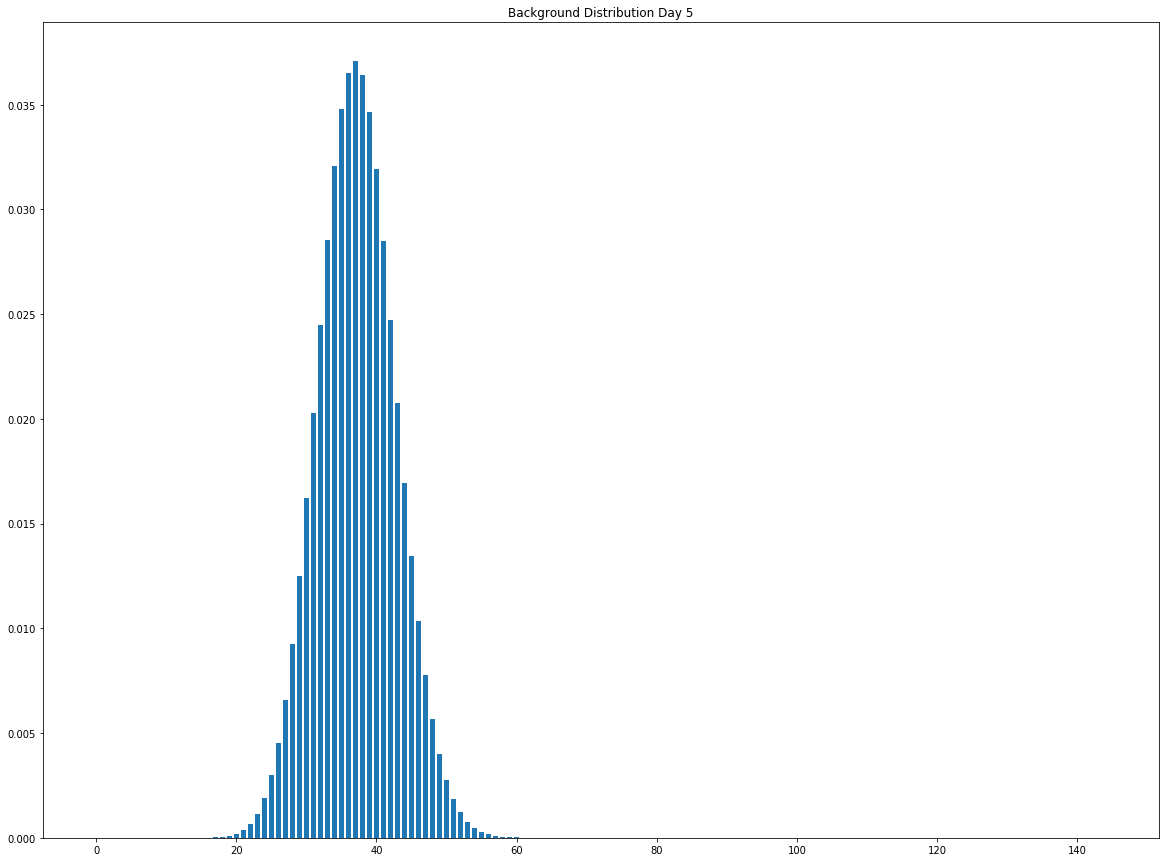

In [20]:
f = np.convolve(f, stats.poisson.pmf(x, mu))
x = np.arange(0, len(f))
plt.title("Background Distribution Day 5")
plt.bar(x, f)

table = pd.crosstab(f, stats.poisson.pmf(x, mu))
chi2, p, dof, expected = chi2_contingency(table.values)
print("Chi-square value: ", chi2, " P-value: ", p)

The summation of Poisson distributions is still a Poisson and this makes sense mathematically when we analyze the equation, P(k events in interval) = (lambda^k)(e^(-lambda))/(k!). The convolution, or summation of multiple Poisson distributions is just P * P and when you solve this equation out you get that (P convolved with P) = (lambda^2k)(e^(-lambda1 + -lambda2))/(k!) and thus the general form of the Poisson equation does not change. Generally, Poisson(lambda1) + Poisson(lambda2) = Poisson(lambda1 + lambda2). Conceptually this makes sense because each Poisson distribution is distribution of discrete values and so convolving one Poisson with another would just involved adding these discrete values together and then forming your distribution. Another way of confirming these results is through null hypothesis significance testing where we do chi-squared testing and see if the p value is less than or equal to .5. The p value we calculated was .239 which is less than .5, thus we can ignore null hypothesis and determine that the two poisson distributions are correlated with one another and thus add up to a Poisson distribution.

### C)

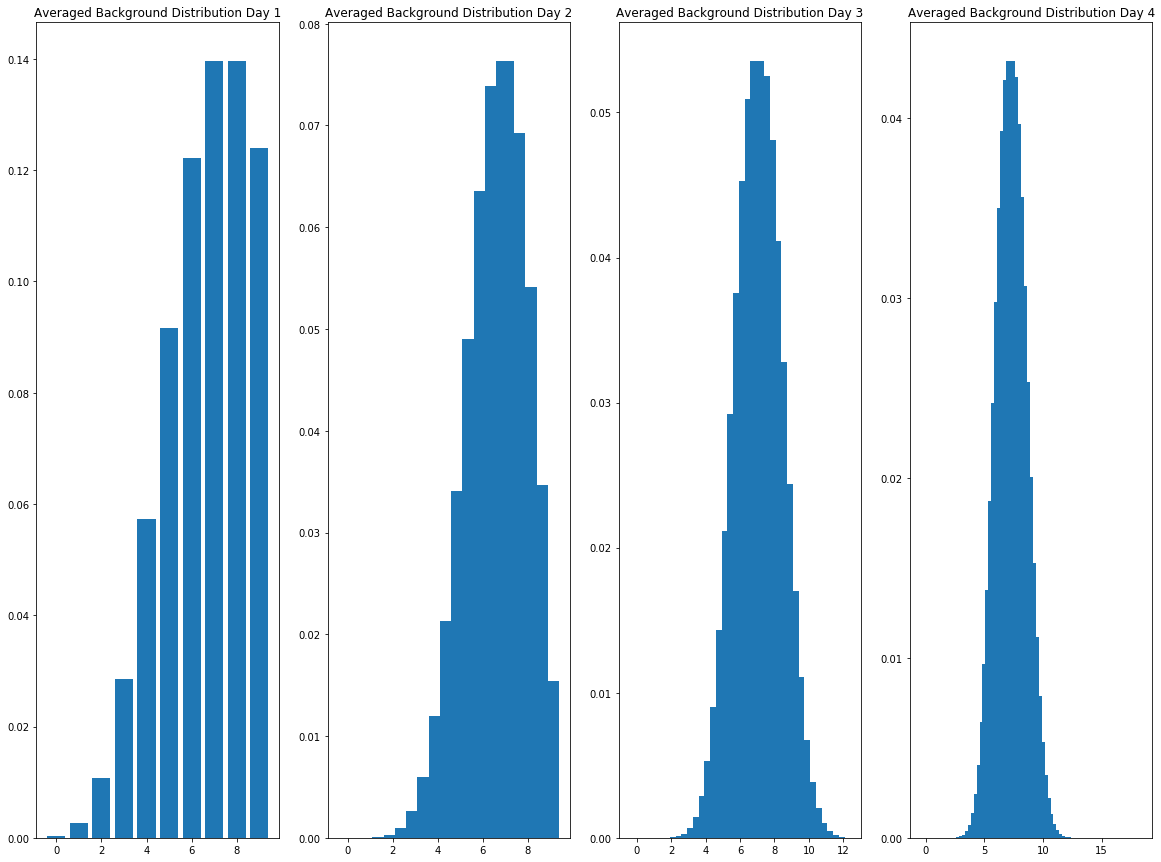

In [39]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(1, 4)

x = np.arange(0, 10)
f = stats.poisson.pmf(x, mu)
ax[0].set_title("Averaged Background Distribution Day 1")
ax[0].bar(x, f)

for i in range(1, 4):
    f = np.convolve(f, stats.poisson.pmf(x, mu))
    x = np.arange(0, len(f))
    ax[i].set_title("Averaged Background Distribution Day " + str(i + 1))
    ax[i].bar(x / (i + 1), f)

Each time we convolve the distribution with other Poisson distributions it looks increasingly similar to a Gaussian distribution. This makes sense with respect to part B) because we are adding all of the discrete samples of two Poisson distributions together into one and so with more samples we are getting more reliable and thus more Gaussian data, especially when we take the average of these data points over days. This relates to the Central Limit Theorem in that as we increase the number of samples through means such as convolving distributions the distribution will increasingly look more Gaussian over time regardless of the shape of the population distribution.

### D)

In [22]:
N = 5 # number of days
Y = 9 # average number of gamma rays emitted
gamma = N * Y
integral = stats.poisson.cdf(gamma, 40)
print("Probability: " + str(integral))
sigma = stats.norm.ppf(integral)
print("Sigma: " + str(sigma))

Probability: 0.8096500884346276
Sigma: 0.8766075754074504


## Problem 2

### A)

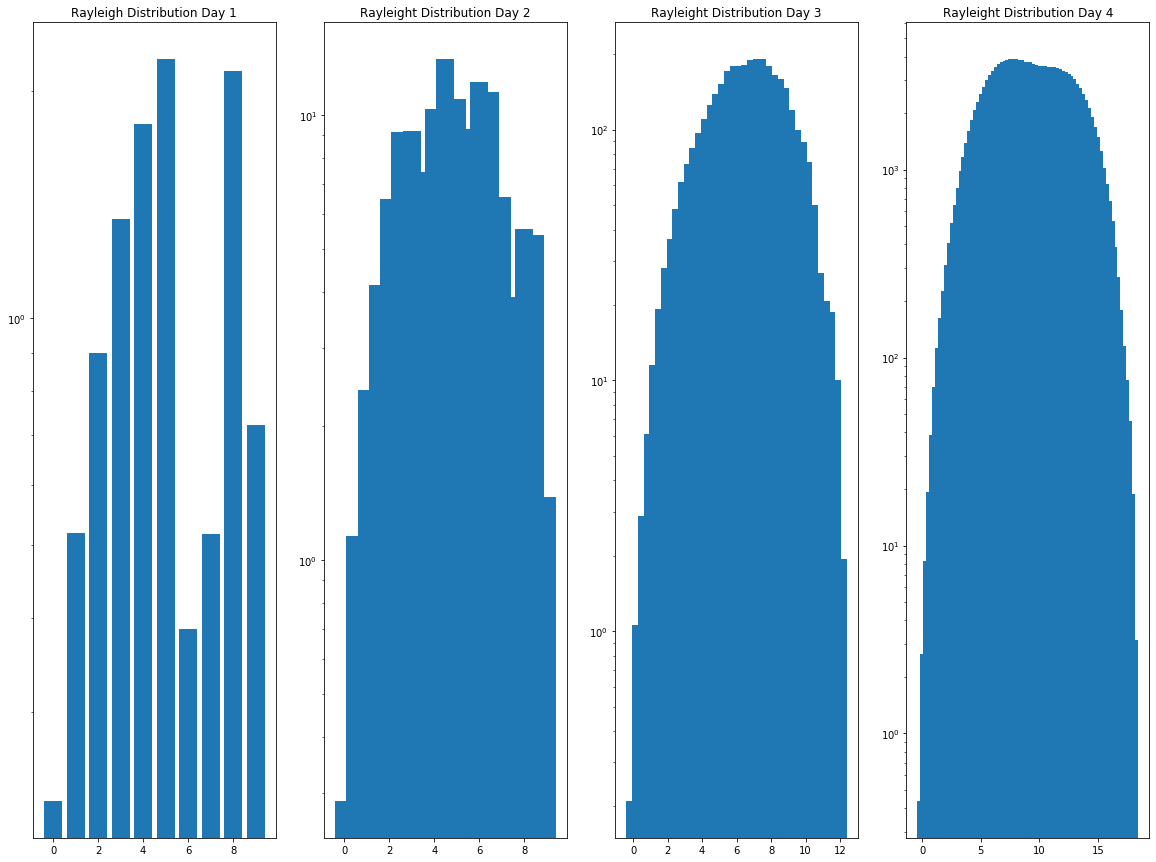

In [23]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(1, 4)

x = np.arange(0, 10)
f = stats.rayleigh.rvs(size = len(x))
ax[0].set_title("Rayleigh Distribution Day 1")
ax[0].bar(x, f)
ax[0].set_yscale('log')

for i in range(1, 4):
    f = np.convolve(f, stats.rayleigh.rvs(size = len(x)))
    x = np.arange(0, len(f))
    ax[i].set_title("Rayleight Distribution Day " + str(i + 1))
    ax[i].bar(x / (i + 1), f)
    ax[i].set_yscale('log')

### B)

As you average over more observing intervals the range of the x axis becomes wider and the distribution becomes seemingly more and more Gaussian. You see the Gaussian shape forming over each iteration and most notably appearing in the third iteration. However, if you take the logarithmic scale of the results you will see that the distribution is still Rayleighs and not quite Gaussian. This is not to say this distribution does not obey CLT but rather that it has not had enough iterations to become Gaussian yet.

## Problem 3

## Version 1

### A)

In [42]:
X = 2.4 # width of the background Gaussian dist.
Y = 11.4 # strength of signal
prob = 1 - stats.norm.cdf(Y, scale = X)
sigma = stats.norm.ppf(1 - prob)
print('Significance: ' + str(sigma) + ' sigma')


Significance: 4.750000000010472 sigma


This is slightly short of being able to claim a certainty of 5 sigma because we have the standard deviation of the background Gaussian Dist. set at 2.4 and a signal of strength 11.4 which is within 4 standard deviations of this number.

## Version 2

### B)

With no associated detection the question at hand is, "for any given pixel what is the probability of each floating point brightness?"

<BarContainer object of 10000 artists>

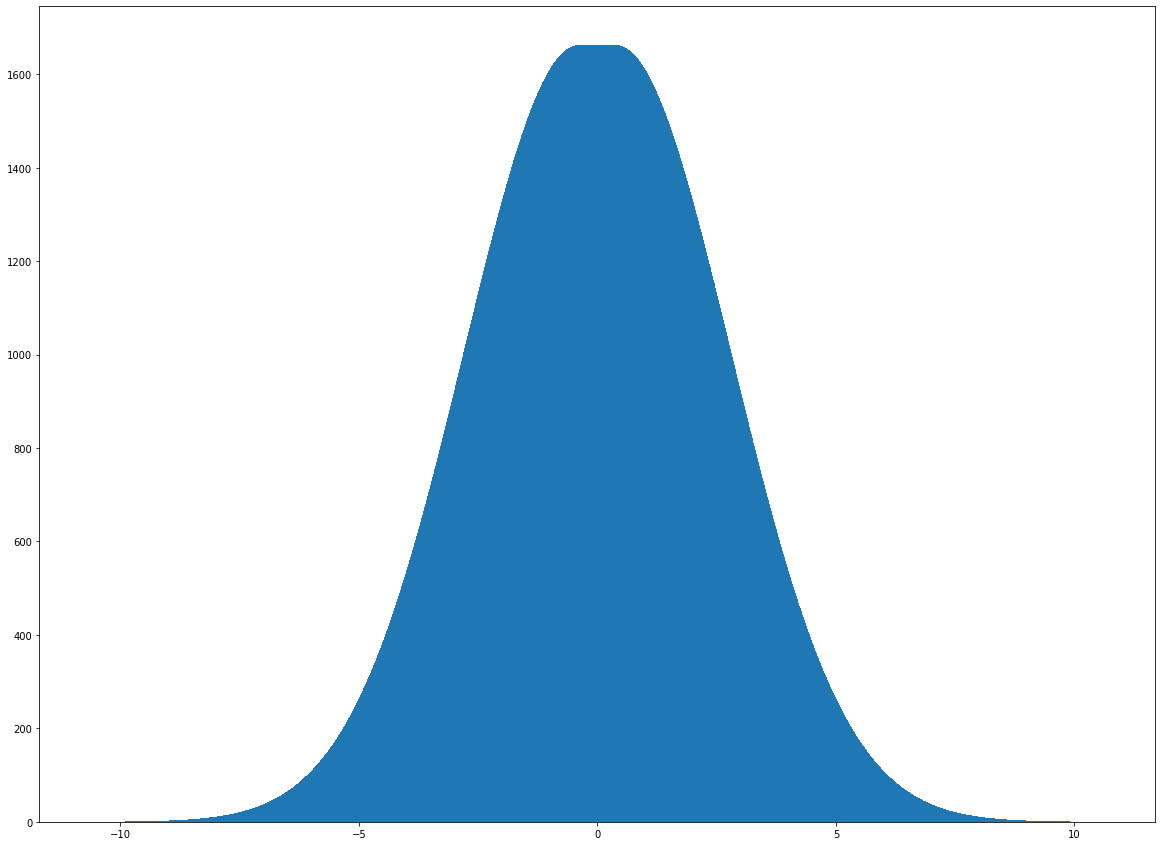

In [33]:
ranges = np.linspace(stats.norm.ppf(0.00001, scale=2.4),
                stats.norm.ppf(0.99999, scale=2.4),
                10000)
plt.bar(ranges, stats.norm.pdf(ranges, scale = 2.4) * 10000)

### C)

My brightest candidate signal is Y = 11.4 and so the question I am tackling here is "What is the probability of a signal of strength of 11.4 in the background of 10000 pixels?"

In [34]:
prob = (1 - stats.norm.cdf(11.4, scale=2.4)) * 10000
sigma = stats.norm.ppf(1 - prob)
print('Significance is: ' + str(sigma) + ' sigma')

Significance is: 2.3199854426078668 sigma


This result is interesting because it is telling us that the probability of a source of strength 11.4 is greater in a 10k pixel breadth compared to the probability of this strength in a known pixel. More specifically the significance in the 10k pixel breadth situation is 2.3 sigma compared to the 4.7 sigma in the previous question so the 10k pixel breadth is more significant.

## Problem 4

### A)

In [35]:
five = 1 - stats.norm.cdf(5)
source = stats.norm.ppf(1 - five, scale = X)
print('Signal strength needed to reach 5 sigma: ' + str(source))

Signal strength needed to reach 5 sigma: 11.999999999928422


### B)

In [36]:
source = stats.norm.ppf(1 - five/10000, scale = X)
print('Signal strength needed to reach 5 sigma: ' + str(source))

Signal strength needed to reach 5 sigma: 15.721289968539972


### C)

15.72/11.99 = 1.311 so the signal must be 1.311 times brighter if you have a trials factor of 10k. The explanation for why the sensitivity penalty is so low can be seen when looking at the shape of a Gaussian distribution. As you go towards the tail end of the distribution, or as the source becomes brighter, the magnitude rapidly declines and so clearly the probabilties towards the tail are much smaller than their predecessor. Thus, if you are looking for the probability of a background signal from a trials factor of 10k and the signal found is only slightly bigger than the original it still yields a probability magnitudes lower than its predecessor.

### D)

In [37]:
signal = stats.norm.ppf(1 - five/10000000, scale = X)
print("Signal of 1 million trial: " + str(signal))
print("This is 1.50 times the value of the first 5 sigma value of 11.99")

Signal of 1 million trial: 18.033929134609306
This is 1.50 times the value of the first 5 sigma value of 11.99


This is again not that large of an effect on the 5 sigma threshold given the order of magnitudes of increase. If the rate at which the magnitude increases with respect to each increase in order of magnitude is linear then for each order of magnitude the signal strength needed to reach 5 sigma is equal to "value = original * (1 + (.07 * (each order of magnitude))). This increase is small for the same reason discussed in part C.

## Extra Credit

Let's examine the lognormal distribution function with the same scale factor of X = 2.4

<BarContainer object of 10000 artists>

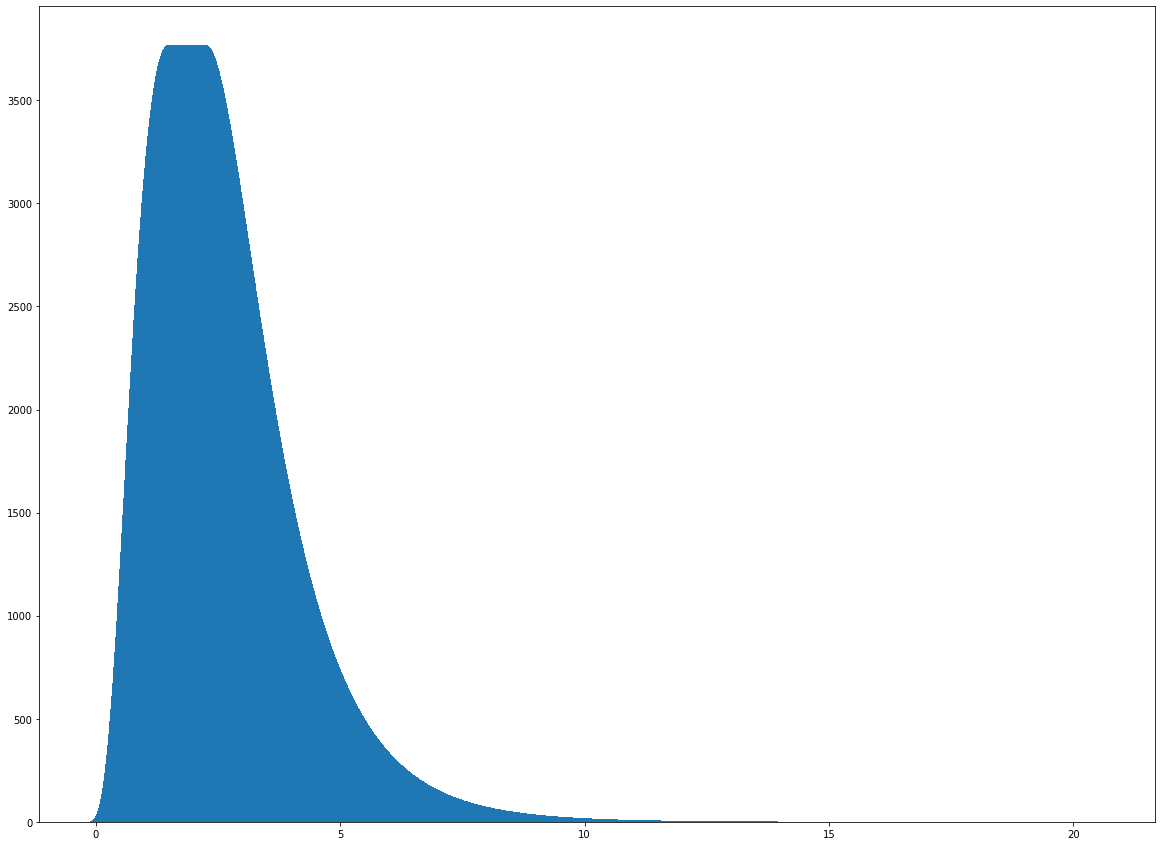

In [38]:
s = .5
ranges = np.linspace(stats.lognorm.ppf(0.00001, s, scale=2.4),
                stats.lognorm.ppf(0.99999, s, scale=2.4),
                10000)
plt.bar(ranges, stats.lognorm.pdf(ranges, s, scale = 2.4) * 10000)

In [31]:
base = stats.lognorm.ppf(1-five, s, scale=X)
print("Signal strength needed to reach 5 sigmas (Trial factors of 1): " + str(base))
signal2 = stats.expon.ppf(1-five/10000, s, scale=X)
print("Signal strength needed to reach 5 sigmas (Trial factor of 10000): " + str(signal2))
signal3 = stats.expon.ppf(1-five/10000000, s, scale=X)
print("Signal strength needed to reach 5 sigmas (Trial factor of 10000000): " + str(signal3))

factor = signal2/base
print("Signal factor (Trial factor from 1 -> 10000): " + str(factor))
factor = signal3/base
print("Signal factor (Trial factor from 1 -> 10000000): " + str(factor))

Signal strength needed to reach 5 sigmas (Trial factors of 1): 29.237985505252336
Signal strength needed to reach 5 sigmas (Trial factor of 10000): 58.76081101620026
Signal strength needed to reach 5 sigmas (Trial factor of 10000000): 75.34121836341316
Signal factor (Trial factor from 1 -> 10000): 2.0097421214482925
Signal factor (Trial factor from 1 -> 10000000): 2.5768265857399375


We can observe, from these results, that lognormal distributions are much more sesnitive to trial factors compared to the Gaussian distribution. An interesting observation to note however is that the sensitivity begins to fall off and dullens as trial factors are continuously increased in a similar fashion to the Gaussian. Both of these results can be attribted to the same reason for the results with the Gaussian: shape of curve. The lognormal shoots up sharply but on its way down it has less of a harsh drop in magnitude. Thus, probability decays slower in the lognormal distribution compared to the Gaussian as the signal gets brighter so the probability of getting the signal from the background is much higher than in the Gaussian. The sensitivity falls off as we go to higher trial factors because the lognormal distribution decays to a point where the background signal probability calculated at a higher trial factor is magnitudes smaller than the one previously calculated.